Importation des données

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = './data/csv-theorique/'
agency = pd.read_csv(url + 'agency.csv', sep=';')
calendar = pd.read_csv(url + 'calendar.csv', sep=';')
calendar_dates = pd.read_csv(url + 'calendar_dates.csv', sep=';')
routes = pd.read_csv(url + 'routes.csv', sep=';')
stop_times = pd.read_csv(url + 'stop_times.csv', sep=';')
stops = pd.read_csv(url + 'stops.csv', sep=';')
trips = pd.read_csv(url + 'trips.csv', sep=';')

In [107]:
routes = routes.set_index('route_id')

In [108]:
routes = routes.drop(['route_color', 'route_text_color', 'route_url', 'route_sort_order', 'agency_id'], axis=1)

In [109]:
routes

,route_short_name,route_long_name,route_type
route_id,,,
1,F1,Plaine de la Ronce <> Stade Diochon,3
2,F2,Centre commercial de La Vatine <> Tamarelle,3
3,F3,Hôtel de Ville de Sotteville <> Tourville-la-R...,3
4,F4,Hameau de Frévaux <> Mont-Riboudet,3
5,F5,Théâtre des Arts <> Lycée Galilée,3
...,...,...,...
414,414,Filo'R Zone 5,3
521,521,AlloBus Zone 1,715
522,522,AlloBus Zone 2,715


In [110]:
trips = trips.set_index('trip_id')

In [111]:
trips = trips.drop(['trip_headsign', 'wheelchair_accessible', 'bikes_allowed', 'block_id'], axis=1)

Répartition du nombre de services par ligne

<Axes: ylabel='count'>

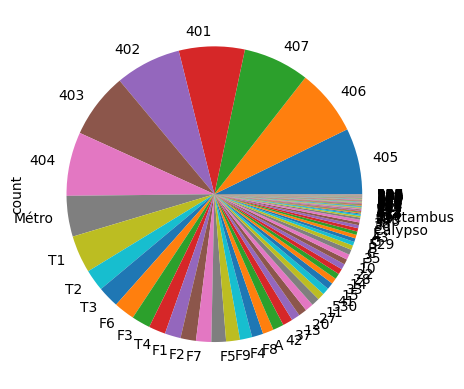

In [112]:
trips.route_short_names.value_counts().plot(kind='pie')

In [113]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,0,07:11:00,07:11:00,12176,1,NaN,NaN
1,0,07:13:00,07:13:00,12175,2,NaN,NaN
2,0,07:14:00,07:14:00,11039,3,NaN,NaN
3,0,07:15:00,07:15:00,12173,4,NaN,NaN
4,0,07:16:00,07:16:00,11347,5,NaN,NaN


In [114]:
stop_times.dtypes

trip_id             int64
arrival_time       object
departure_time     object
stop_id             int64
stop_sequence       int64
pickup_type       float64
drop_off_type     float64
dtype: object

In [115]:
trips.query('route_id == 1').head()

,route_id,service_id,direction_id,route_short_names,Jours validité
trip_id,,,,,
24606,1,T23_RO-2-31,0,F1,1111100
24607,1,T23_RO-2-31,0,F1,1111100
24608,1,T23_RO-2-31,0,F1,1111100
24609,1,T23_RO-2-31,0,F1,1111100
24610,1,T23_RO-2-31,0,F1,1111100


<Axes: ylabel='count'>

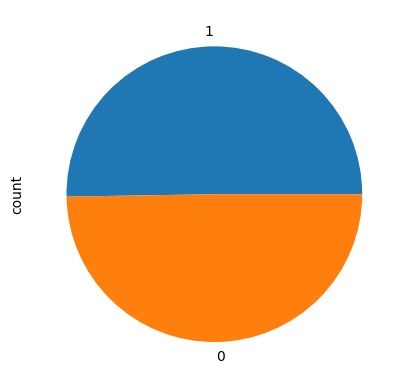

In [116]:
trips.query('route_id == 1').direction_id.value_counts().plot(kind='pie')

In [117]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,0,07:11:00,07:11:00,12176,1,NaN,NaN
1,0,07:13:00,07:13:00,12175,2,NaN,NaN
2,0,07:14:00,07:14:00,11039,3,NaN,NaN
3,0,07:15:00,07:15:00,12173,4,NaN,NaN
4,0,07:16:00,07:16:00,11347,5,NaN,NaN


In [118]:
stop_times.arrival_time = pd.to_datetime(stop_times.arrival_time, format='%H:%M:%S')

stop_times["departure_time_hour"] = pd.to_datetime(stop_times.departure_time, format='%H:%M:%S').dt.hour

In [119]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,departure_time_hour
0,0,1900-01-01 07:11:00,07:11:00,12176,1,NaN,NaN,7.0
1,0,1900-01-01 07:13:00,07:13:00,12175,2,NaN,NaN,7.0
2,0,1900-01-01 07:14:00,07:14:00,11039,3,NaN,NaN,7.0
3,0,1900-01-01 07:15:00,07:15:00,12173,4,NaN,NaN,7.0
4,0,1900-01-01 07:16:00,07:16:00,11347,5,NaN,NaN,7.0


<Axes: xlabel='departure_time_hour'>

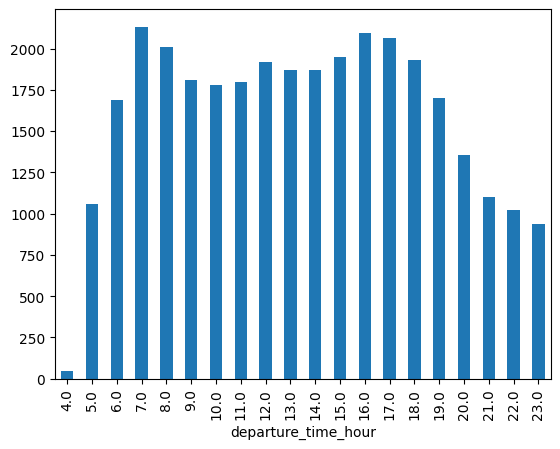

In [120]:
stop_times.query('stop_sequence == 1').departure_time_hour.value_counts().sort_index().plot(kind='bar')

In [121]:
a = np.datetime64('2019-01-01 00:00:00')

In [122]:
a > np.datetime64('2023-01-01 00:00:00')

False